# Age distribution (taking from RKI data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

# Preparing the dataset

## Read dataset and view info

In [2]:
ds=pd.read_csv(r'RKI_COVID19.csv', index_col='FID')
ds

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
FID,,,,,,,,,,,,,,,,,
9674837,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"31.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
9674838,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"31.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
9674839,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"31.05.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
9674840,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"31.05.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
9674841,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"31.05.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819927,16,Thüringen,LK Altenburger Land,A80+,M,1,0,2020/05/07 00:00:00,16077,"31.05.2020, 00:00 Uhr",0,-9,2020/05/05 00:00:00,-9,0,1,Nicht übermittelt
9819928,16,Thüringen,LK Altenburger Land,A80+,M,1,0,2020/05/28 00:00:00,16077,"31.05.2020, 00:00 Uhr",0,-9,2020/05/28 00:00:00,-9,0,0,Nicht übermittelt
9819929,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2020/05/06 00:00:00,16077,"31.05.2020, 00:00 Uhr",0,-9,2020/05/04 00:00:00,-9,0,1,Nicht übermittelt


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145095 entries, 9674837 to 9819931
Data columns (total 17 columns):
IdBundesland            145095 non-null int64
Bundesland              145095 non-null object
Landkreis               145095 non-null object
Altersgruppe            145095 non-null object
Geschlecht              145095 non-null object
AnzahlFall              145095 non-null int64
AnzahlTodesfall         145095 non-null int64
Meldedatum              145095 non-null object
IdLandkreis             145095 non-null int64
Datenstand              145095 non-null object
NeuerFall               145095 non-null int64
NeuerTodesfall          145095 non-null int64
Refdatum                145095 non-null object
NeuGenesen              145095 non-null int64
AnzahlGenesen           145095 non-null int64
IstErkrankungsbeginn    145095 non-null int64
Altersgruppe2           145095 non-null object
dtypes: int64(9), object(8)
memory usage: 19.9+ MB


## Making text data numeric

The fields 'Refdatum' and 'Meldedatum' (also the field 'Datenstand' – see below) contain time stamps in text form. Some conversion is needed so we can do computations with dates. Since all dates are from the same year and no times occur, we can simply use the day of the year, that is, tm_yday of the time struct.

In [4]:
import time
ds['Ref📅']=ds['Refdatum'].apply(lambda x : time.strptime(x[:10],'%Y/%m/%d')[7])
ds['Mel📅']=ds['Meldedatum'].apply(lambda x : time.strptime(x[:10],'%Y/%m/%d')[7])

Take a look at first entry to see if it looks correct:

In [5]:
ds.iloc[0]

IdBundesland                                1
Bundesland                 Schleswig-Holstein
Landkreis                        SK Flensburg
Altersgruppe                          A15-A34
Geschlecht                                  M
AnzahlFall                                  1
AnzahlTodesfall                             0
Meldedatum                2020/03/14 00:00:00
IdLandkreis                              1001
Datenstand              31.05.2020, 00:00 Uhr
NeuerFall                                   0
NeuerTodesfall                             -9
Refdatum                  2020/03/16 00:00:00
NeuGenesen                                  0
AnzahlGenesen                               1
IstErkrankungsbeginn                        1
Altersgruppe2               Nicht übermittelt
Ref📅                                       76
Mel📅                                       74
Name: 9674837, dtype: object

## Streamline dataset

The information of the fields 'IdBundesland','Bundesland','Landkreis' is (or should be) all redundant with field 'IdLandkreis' and can therefore be deleted. (See https://www.kaggle.com/sebastianhelm/rki-covid19csv.) 

The one remaining field that might conceivably contain information is the 'Datenstand' ('version') field, so let's check if there are any differences:

In [6]:
ds_ds0 = ds.iloc[0]['Datenstand']
ds[ds['Datenstand'].apply(lambda x : x!=ds_ds0)]

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2,Ref📅,Mel📅
FID,,,,,,,,,,,,,,,,,,,


There are no differences, so we can simply delete this field, along with the other redundant ones.

In [7]:
ds=ds.drop(['IdBundesland','Bundesland','Landkreis','Refdatum','Meldedatum','Datenstand'],axis=1)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145095 entries, 9674837 to 9819931
Data columns (total 13 columns):
Altersgruppe            145095 non-null object
Geschlecht              145095 non-null object
AnzahlFall              145095 non-null int64
AnzahlTodesfall         145095 non-null int64
IdLandkreis             145095 non-null int64
NeuerFall               145095 non-null int64
NeuerTodesfall          145095 non-null int64
NeuGenesen              145095 non-null int64
AnzahlGenesen           145095 non-null int64
IstErkrankungsbeginn    145095 non-null int64
Altersgruppe2           145095 non-null object
Ref📅                    145095 non-null int64
Mel📅                    145095 non-null int64
dtypes: int64(10), object(3)
memory usage: 15.5+ MB


In [9]:
ds

,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2,Ref📅,Mel📅
FID,,,,,,,,,,,,,
9674837,A15-A34,M,1,0,1001,0,-9,0,1,1,Nicht übermittelt,76,74
9674838,A15-A34,M,1,0,1001,0,-9,0,1,1,Nicht übermittelt,73,79
9674839,A15-A34,M,1,0,1001,0,-9,0,1,1,Nicht übermittelt,76,79
9674840,A15-A34,M,1,0,1001,0,-9,0,1,1,Nicht übermittelt,73,81
9674841,A15-A34,M,1,0,1001,0,-9,0,1,1,Nicht übermittelt,82,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819927,A80+,M,1,0,16077,0,-9,-9,0,1,Nicht übermittelt,126,128
9819928,A80+,M,1,0,16077,0,-9,-9,0,0,Nicht übermittelt,149,149
9819929,A80+,W,1,0,16077,0,-9,-9,0,1,Nicht übermittelt,125,127


## 	Age groups

Collect unique values of the Altersgruppe field in a list to see what we got. This also can be used to replace the strings with numbers so they're less unwieldy. (In German, “Altersgruppen” is the plural of “Altersgruppe” (age group). ) 

In [10]:
Altersgruppen_as_set = set(ds['Altersgruppe'].tolist()) # As set so we get the unique values.
Altersgruppen = list(Altersgruppen_as_set)
Altersgruppen.sort()     # Needed to make it reproduceable. Also, it's more intuitive this way.
Altersgruppen

['A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt']

Let's define a function that will allow numeric sorting.

In [11]:
def Agegroup_number(s):
   return Altersgruppen.index(s) 

We will later also often need the number of age groups:

In [12]:
n_ages = len(Altersgruppen)

## 	Gender

Collect unique values of the Geschlecht field in a list to see what we got. This also can be used to replace the strings with one-bite characters so they're less unwieldy. (In German, “Geschlechter” is the plural of “Geschlecht” (gender). ) 

In [13]:
Geschlechter_as_set = set(ds['Geschlecht'].tolist())
Geschlechter = list(Geschlechter_as_set)
Geschlechter.sort()     # Needed to make it reproduceable. Also, it's more intuitive this way.
Geschlechter

['M', 'W', 'unbekannt']

Let's define a function that will simplify comparison. This time, we just use one character for easier packing.

In [14]:
def Gender(s):
    return s[:1]

# Age distribution

In this workbook, we're investigating age differences. So let's build an age pyramid.

## Simple pyramid

The easiest way to display a pyramid is by simply displaying the age brackets used by RKI. 

In [15]:
ds['ag'] = ds['Altersgruppe'].apply(Agegroup_number)

In [16]:
male = ds[(ds.Geschlecht == "M")].groupby('ag').sum()
male

,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Ref📅,Mel📅
ag,,,,,,,,,,
0,995,0,7079792,1,-8271,-924,878,520,93594,96711
1,2241,0,15199513,11,-17658,-1608,2014,1161,195248,202025
2,22524,12,134761648,35,-156375,-7351,21259,13477,1626406,1716555
3,35699,277,214764184,39,-245790,-11126,34163,22486,2477100,2638015
4,17725,1876,120797050,17,-122281,-21896,15165,11669,1412015,1495533
5,7368,2543,52376942,7,-38041,-24014,4507,4336,642066,666119
6,62,0,374000,2,-504,-88,51,19,5859,6103


In [17]:
female = ds[(ds.Geschlecht == "W")].groupby('ag').sum()
female

,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Ref📅,Mel📅
ag,,,,,,,,,,
0,884,1,6375948,4,-7317,-782,782,492,83800,86534
1,2052,0,14657121,11,-16722,-1382,1870,1176,183370,190486
2,23087,5,146250779,29,-168714,-6810,22156,14938,1747256,1847594
3,39347,94,239175931,38,-271781,-10910,37899,24892,2787960,2961340
4,16075,827,109227134,21,-117458,-12142,14655,10399,1286991,1359783
5,13037,2860,73587241,6,-60916,-27025,9506,5899,927697,958070
6,44,0,298625,1,-378,-27,40,12,4347,4402


In [18]:
tick_positions = [0, 1, 2, 3, 4, 5, 6]
tick_positions

[0, 1, 2, 3, 4, 5, 6]

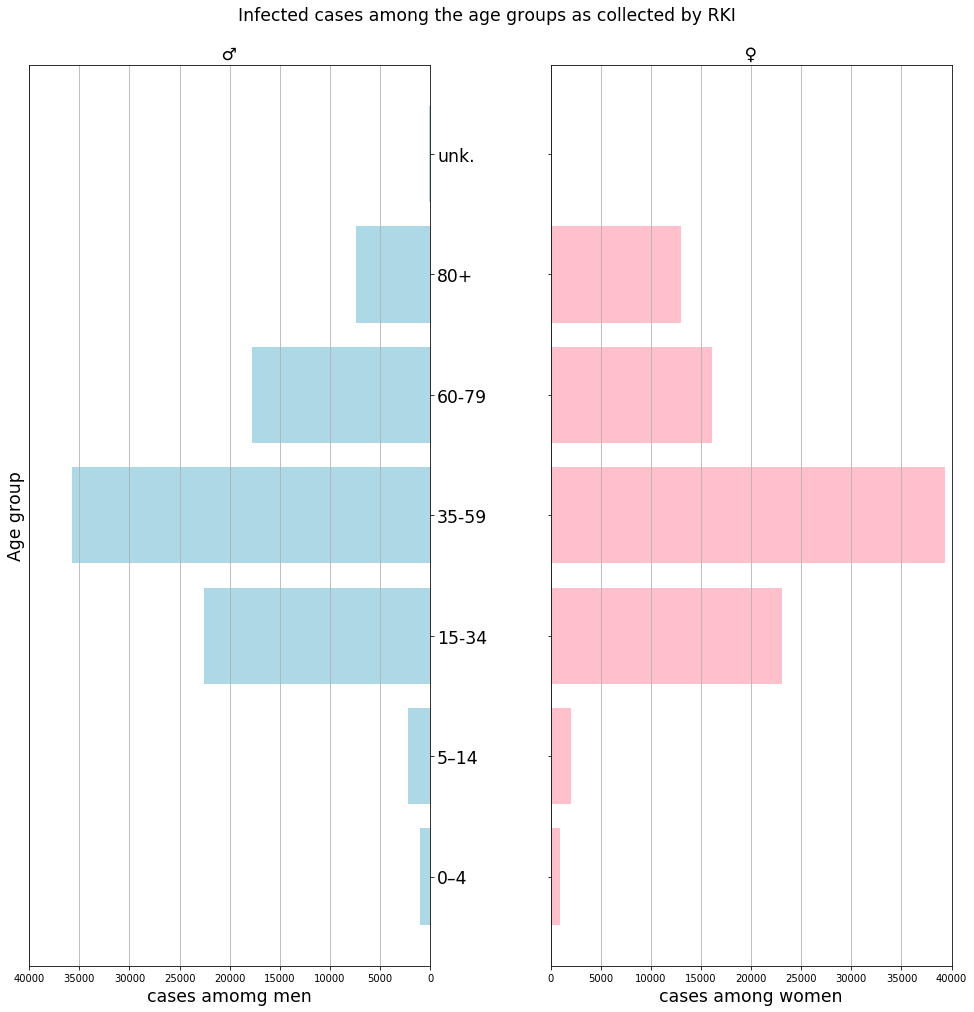

In [19]:
fig, axes = plt.subplots(ncols=2,sharey=True,figsize=(15,15))

fig.suptitle("Infected cases among the age groups as collected by RKI", size= 'xx-large')

axes[0].barh(tick_positions, male['AnzahlFall'], color='lightblue')
axes[0].invert_xaxis()        # men to point left
axes[0].yaxis.tick_right()        # tick labels in middle
axes[0].set_title(" ♂ ", size= 'xx-large')

axes[1].barh(tick_positions, female['AnzahlFall'], color='pink')
axes[1].set_title(" ♀ ", size= 'xx-large')

axes[0].set_yticklabels(['', '0–4', '5–14', '15-34', '35-59', '60-79', '80+', 'unk.'], size= 'xx-large')

axes[0].set_xlabel("cases amomg men", size='xx-large')
axes[0].set_ylabel("Age group", size='xx-large')
axes[1].set_xlabel("cases among women", size='xx-large')

xlim = 40000
axes[0].set_xlim(xlim, 0)
axes[1].set_xlim(0, xlim)

axes[0].xaxis.grid(True) 
axes[1].xaxis.grid(True) 

plt.tight_layout(6)

pyramid0 = fig, axes

In [20]:
male

,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Ref📅,Mel📅
ag,,,,,,,,,,
0,995,0,7079792,1,-8271,-924,878,520,93594,96711
1,2241,0,15199513,11,-17658,-1608,2014,1161,195248,202025
2,22524,12,134761648,35,-156375,-7351,21259,13477,1626406,1716555
3,35699,277,214764184,39,-245790,-11126,34163,22486,2477100,2638015
4,17725,1876,120797050,17,-122281,-21896,15165,11669,1412015,1495533
5,7368,2543,52376942,7,-38041,-24014,4507,4336,642066,666119
6,62,0,374000,2,-504,-88,51,19,5859,6103


In [21]:
female

,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Ref📅,Mel📅
ag,,,,,,,,,,
0,884,1,6375948,4,-7317,-782,782,492,83800,86534
1,2052,0,14657121,11,-16722,-1382,1870,1176,183370,190486
2,23087,5,146250779,29,-168714,-6810,22156,14938,1747256,1847594
3,39347,94,239175931,38,-271781,-10910,37899,24892,2787960,2961340
4,16075,827,109227134,21,-117458,-12142,14655,10399,1286991,1359783
5,13037,2860,73587241,6,-60916,-27025,9506,5899,927697,958070
6,44,0,298625,1,-378,-27,40,12,4347,4402


## Cases per birth year

The figure of the previous section distorts the facts, since it heavily depends on the chosen width for each age bracket. 
Therefore, we need to take that width in account. We will do so by setting the height of the bars proportional to the width of 
each age bracket.

One consideration for this is how to handle group of unknown age (“unk.”). To fairly render it commensurate with the other groups we should somehow distribute it on the other groups, displayed in a different hue. However, given that it consists of far fewer cases than those per year of any given cohort, so that it would not be visible in the graphic, we will simply leave it out. 

In [22]:
n_ages = 6
male_secure = male.drop(n_ages)
female_secure = female.drop(n_ages)

We will set the width of the last group ('80+') arbitrarily to 20, so that it matches that of the group '60-79'.

In [23]:
male_secure

,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Ref📅,Mel📅
ag,,,,,,,,,,
0,995,0,7079792,1,-8271,-924,878,520,93594,96711
1,2241,0,15199513,11,-17658,-1608,2014,1161,195248,202025
2,22524,12,134761648,35,-156375,-7351,21259,13477,1626406,1716555
3,35699,277,214764184,39,-245790,-11126,34163,22486,2477100,2638015
4,17725,1876,120797050,17,-122281,-21896,15165,11669,1412015,1495533
5,7368,2543,52376942,7,-38041,-24014,4507,4336,642066,666119


In [24]:
age_begin = [0, 5, 15, 35, 60, 80]
age_width = [5, 10, 20, 25, 20, 20]
age_mid = [age_begin[j] + age_width[j] * .5 for j in range(n_ages)]

In [25]:
male_secure

,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Ref📅,Mel📅
ag,,,,,,,,,,
0,995,0,7079792,1,-8271,-924,878,520,93594,96711
1,2241,0,15199513,11,-17658,-1608,2014,1161,195248,202025
2,22524,12,134761648,35,-156375,-7351,21259,13477,1626406,1716555
3,35699,277,214764184,39,-245790,-11126,34163,22486,2477100,2638015
4,17725,1876,120797050,17,-122281,-21896,15165,11669,1412015,1495533
5,7368,2543,52376942,7,-38041,-24014,4507,4336,642066,666119


The deciding step consists in dividing the numbers for each age group by the width of that group as follows:

In [26]:
male_secure['age_0'] = age_begin
male_secure['Fall_per_cohort'] = male_secure['AnzahlFall'] / age_width

In [27]:
male_secure

,AnzahlFall,AnzahlTodesfall,IdLandkreis,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Ref📅,Mel📅,age_0,Fall_per_cohort
ag,,,,,,,,,,,,
0,995,0,7079792,1,-8271,-924,878,520,93594,96711,0,199.00
1,2241,0,15199513,11,-17658,-1608,2014,1161,195248,202025,5,224.10
2,22524,12,134761648,35,-156375,-7351,21259,13477,1626406,1716555,15,1126.20
3,35699,277,214764184,39,-245790,-11126,34163,22486,2477100,2638015,35,1427.96
4,17725,1876,120797050,17,-122281,-21896,15165,11669,1412015,1495533,60,886.25
5,7368,2543,52376942,7,-38041,-24014,4507,4336,642066,666119,80,368.40


In [28]:
female_secure['age_0'] = age_begin
female_secure['Fall_per_cohort'] = female_secure['AnzahlFall'] / age_width

This gives us all the data we need for our plot:

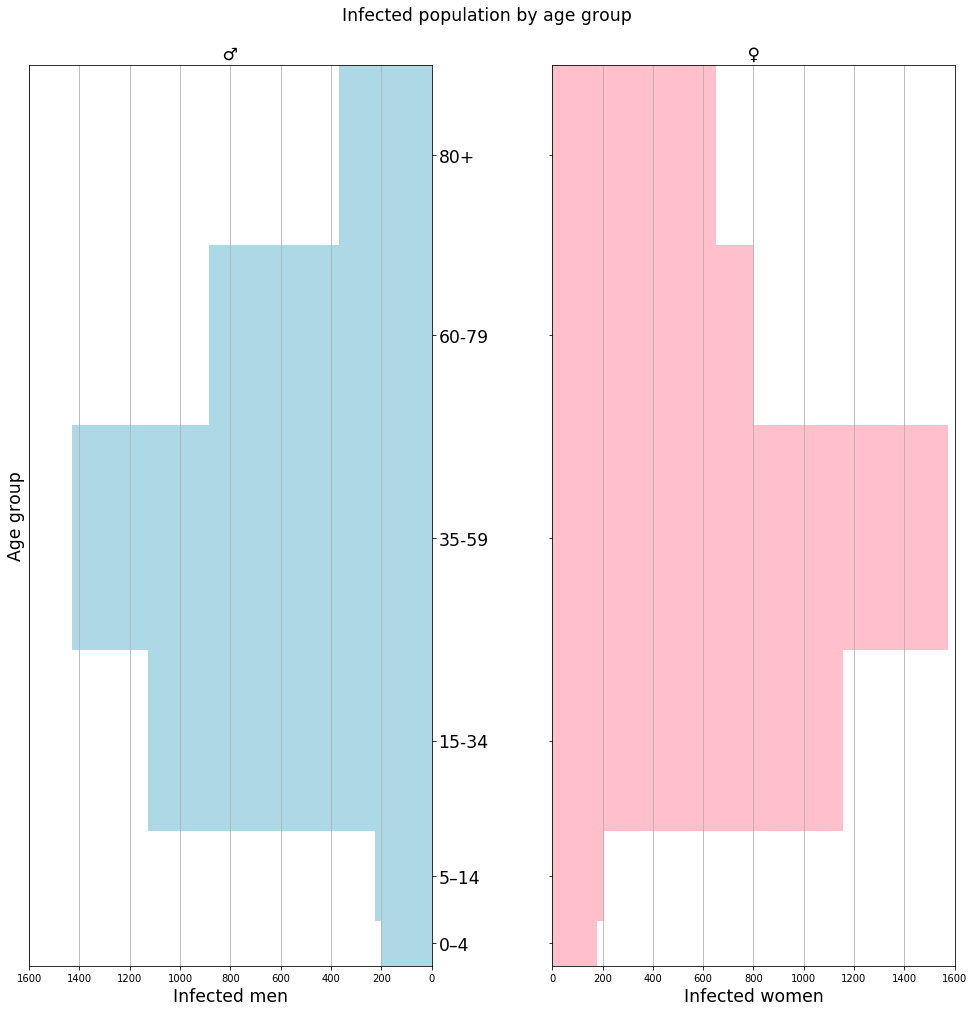

In [29]:
fig, axes = plt.subplots(ncols=2,sharey=True,figsize=(15,15))

fig.suptitle("Infected population by age group", size= 'xx-large')

axes[0].barh(age_mid, male_secure['Fall_per_cohort'], color='lightblue', height=age_width)
axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
axes[0].set_title(" ♂ ", size= 'xx-large')

axes[1].barh(age_mid, female_secure['Fall_per_cohort'], color='pink', height=age_width)
axes[1].set_title(" ♀ ", size= 'xx-large')

axes[0].set_yticks(age_mid)
axes[0].set_yticklabels(['0–4', '5–14', '15-34', '35-59', '60-79', '80+', 'unk.'], size='xx-large')

axes[0].set_xlabel("Infected men", size='xx-large')
axes[0].set_ylabel("Age group", size='xx-large')
axes[1].set_xlabel("Infected women", size='xx-large')

xlim = 1600
axes[0].set_xlim(xlim, 0)
axes[1].set_xlim(0, xlim)
axes[0].set_ylim(0, 100)

axes[0].xaxis.grid(True) 
axes[1].xaxis.grid(True) 

plt.tight_layout(6)

pyramid2 = fig, axes

This shows that the population that had the most COVID-19 cases was the one between 15 and 54. 
This is hardly surprising, since that is also the age group with the strongest representation in Germany. 
While this is important information for society as a whole, this does not allow to assess the risk for the individual.
We will therefore create a third pyramid.

## Risk for the individual

To assess the risk for the individual, we need to divide the case numbers by the numbers of individuals in each age group. In keeping with the principle already applied before that the area of each bar should represent the total number of individuals affected, we will therefore adjust the width of the bars to be proportional to the total size of each age group in the population. (This will also nullify our arbitrary choice for the width of the '80+' age group in the previous section.)

### Population size

For the size of each cohort, I downloaded the semicolon-separated file from the German Federal Bureau of Statistics,
which is available at https://service.destatis.de/bevoelkerungspyramide/#!y=2036, from which I copied the rows for 2018,
the last year for which actual numbers are available as of 5-31-2020. One would think this to be the most reliable source, 
although it is strange how the population for both sexes tapers off linearly to reach zero at age 100 exactly.

In [30]:
bevoelkerung_2018=pd.read_csv(r'bevoelkerung_2018.csv', sep=';')
bevoelkerung_2018

,Variante,Simulationsjahr,mw,Bev,Bev_0_1,Bev_1_2,Bev_2_3,Bev_3_4,Bev_4_5,Bev_5_6,...,Bev_90_91,Bev_91_92,Bev_92_93,Bev_93_94,Bev_94_95,Bev_95_96,Bev_96_97,Bev_97_98,Bev_98_99,Bev_99_100
0,0,2018,m,40967,402,408,411,399,394,380,...,61,45,33,23,15,10,7,5,3,2
1,0,2018,w,42053,382,388,392,378,373,360,...,133,108,90,73,55,41,30,23,15,8


In [31]:
pop = bevoelkerung_2018.T
pop = pop.drop(['Variante', 'Simulationsjahr', 'mw'])
pop

,0,1
Bev,40967,42053
Bev_0_1,402,382
Bev_1_2,408,388
Bev_2_3,411,392
Bev_3_4,399,378
...,...,...
Bev_95_96,10,41
Bev_96_97,7,30
Bev_97_98,5,23
Bev_98_99,3,15


### Adding up cohorts to match the RKI age groups

In [32]:
def pop_cohort(gender, age):
    return pop.loc[f'Bev_{age}_{age+1}'][0 if gender=='M' else 1]

def pop_slice(gender, start, stop):
    ret = 0
    for j in range(int(start), int(stop)):
        ret += pop_cohort(gender, j)
    return ret

In [33]:
male_by_age_group = [ pop_slice('M', age_begin[j], age_begin[j]+age_width[j]) for j in range(n_ages)]
female_by_age_group = [ pop_slice('W', age_begin[j], age_begin[j]+age_width[j]) for j in range(n_ages)]

In [34]:
m_avg_pop_per_cohort = [male_by_age_group[j] / age_width[j] for j in range(n_ages)]
f_avg_pop_per_cohort = [female_by_age_group[j] / age_width[j] for j in range(n_ages)]

In [35]:
max_per_cohort = max(max(m_avg_pop_per_cohort), max(f_avg_pop_per_cohort))

### Making bars narrower depending on size of the age group

In [36]:
male_factor = [m_avg_pop_per_cohort[j] / max_per_cohort for j in range(n_ages)]
female_factor = [f_avg_pop_per_cohort[j] / max_per_cohort for j in range(n_ages)]

In [37]:
m_width = [male_factor[j] * age_width[j] for j in range(n_ages)]
f_width = [female_factor[j] * age_width[j] for j in range(n_ages)]

### Final plot

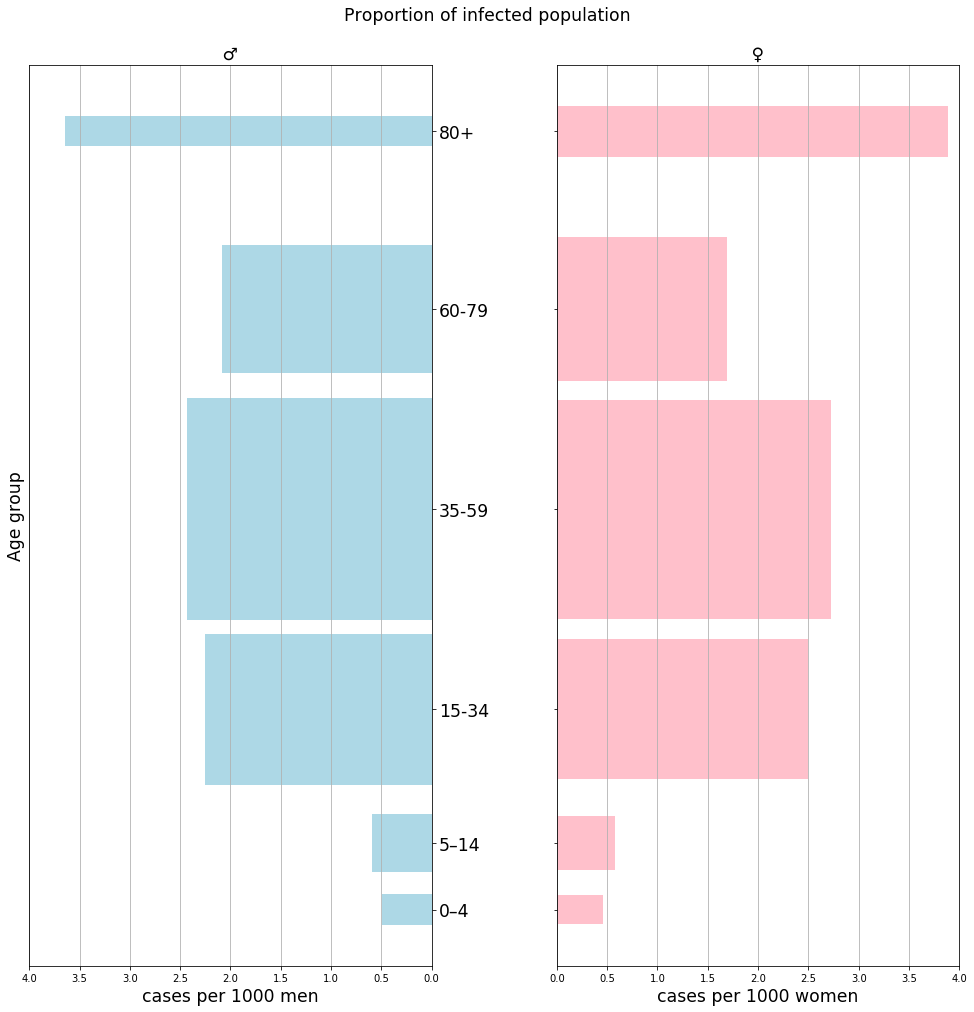

In [38]:
fig, axes = plt.subplots(ncols=2,sharey=True,figsize=(15,15))

fig.suptitle("Proportion of infected population", size= 'xx-large')

axes[0].barh(age_mid, male_secure['AnzahlFall'] / male_by_age_group, color='lightblue', height=m_width)
axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
axes[0].set_title(" ♂ ", size= 'xx-large')

axes[1].barh(age_mid, female_secure['AnzahlFall'] / female_by_age_group, color='pink', height=f_width)
axes[1].set_title(" ♀ ", size= 'xx-large')

axes[0].set_yticks(age_mid)
axes[0].set_yticklabels(['0–4', '5–14', '15-34', '35-59', '60-79', '80+'], size='xx-large')

axes[0].set_xlabel("cases per 1000 men", size='xx-large')
axes[0].set_ylabel("Age group", size='xx-large')
axes[1].set_xlabel("cases per 1000 women", size='xx-large')

xlim = 4
axes[0].set_xlim(xlim, 0)
axes[1].set_xlim(0, xlim)

axes[0].xaxis.grid(True) 
axes[1].xaxis.grid(True) 

plt.tight_layout(6)

pyramid3 = fig, axes

Compare this plot with the first one: It shows that there are three distinct groups with different risk factors: 

• Under 15 years – about 0.5 cases per 1000

• Between 15 years and 80 years – about 2 to 2.5 cases per 1000

• Over 80 years – about 3.75 cases per 1000
